In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("PDFMalware2022.csv")
df.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [3]:
def prettyPrint_DF (df):
    print(f"pdfsize min:  {df['pdfsize'].min()}           max: {df['pdfsize'].max()}")
    for col in df.columns:
        print(f"----------------------------- COL: {col} --------------------------------")
        try:
            print(f"{str(col)} min:  {df[col].min()}           max: {df[col].max()}")
            print(f"Unique values are: {df[col].unique()}")
                
        except:
            print(f"ERRROR in col: {col}")
            print(f"Has nans: {df[col].hasnans}")
        
        print(f"\n\nColumn Type: {df[col].dtype}\n\n\n\n")



def Cleanse_DataFrame(df):
    df.dropna(inplace=True)

    prettyPrint_DF(df)


    # isEncrypted
    df = df.drop(df[df['isEncrypted'] == 2].index)
    df = df.drop(df[df['isEncrypted'] == 3].index)
    df = df.drop(df[df['isEncrypted'] == 4].index)


    # text
    df = df.drop(df[df['text'] == '0'].index)

    # pages
    df['pages'] = df['pages'].astype(int)

    # images
    df['images'] = df['images'].astype(int)

    # header
    df['header_regex_boolean'] = df.header
    regex_pattern = '^\\t%PDF-\d\.\d$'
    # Apply regex pattern to each column
    df['header_regex_boolean'] = df['header_regex_boolean'].apply(lambda x: True if re.findall(regex_pattern,str(x)) else False)
    df['header_regex_boolean'] = df['header_regex_boolean'].astype(bool)


    df['PDF_Version'] = df.header
    regex_pattern = '^\\t%PDF-(\d\.\d)$'
    # Apply regex pattern to each column
    df['PDF_Version'] = df['PDF_Version'].apply(lambda x: re.findall(regex_pattern,str(x))[0] if re.findall(regex_pattern,str(x)) else '-1')
    df['PDF_Version'] = df['PDF_Version'].astype(float)
    
    


    # obj
    df['obj_temp'] = df.obj
    regex_pattern = '[a-zA-Z]'
    # Apply regex pattern to each column
    df['obj_temp'] = df['obj_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['obj_temp'] = df['obj_temp'].astype(int)
    df.obj = df['obj_temp']
    df.drop("obj_temp", axis=1)


    # endobj
    df['endobj_temp'] = df.endobj
    regex_pattern = '[a-zA-Z]'
    # Apply regex pattern to each column
    df['endobj_temp'] = df['endobj_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['endobj_temp'] = df['endobj_temp'].astype(int)
    df.endobj = df['endobj_temp']
    df.drop("endobj_temp", axis=1)
    
    

    # stream
    df['stream'] = df['stream'].astype(int)

    # endstream
    df['endstream_temp'] = df.endstream
    regex_pattern = '[a-z\)A-Z\(]'
    # Apply regex pattern to each column
    df['endstream_temp'] = df['endstream_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['endstream_temp'] = df['endstream_temp'].astype(int)
    df.endstream = df['endstream_temp']
    df.drop("endstream_temp", axis=1)

    # title characters
    df["title characters"] = df["title characters"].astype(int)


    # xref
    df['xref_temp'] = df.xref
    regex_pattern = '[a-z\)A-Z\(]'
    # Apply regex pattern to each column
    df['xref_temp'] = df['xref_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['xref_temp'] = df['xref_temp'].astype(int)
    df.xref = df['xref_temp']
    df.drop("xref_temp", axis=1)

    # startxref
    df['startxref_temp'] = df.startxref
    regex_pattern = '[a-z\)A-Z\(]'
    # Apply regex pattern to each column
    df['startxref_temp'] = df['startxref_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['startxref_temp'] = df['startxref_temp'].astype(int)
    df.startxref = df['startxref_temp']
    df.drop("startxref_temp", axis=1)


    # trailer
    df['trailer'] = df['trailer'].astype(int)

    # xref Length
    df["xref Length"] = df["xref Length"].astype(int)

    # pageno
    df['pageno_temp'] = df.pageno
    regex_pattern = '[a-z\)A-Z\(]'
    # Apply regex pattern to each column
    df['pageno_temp'] = df['pageno_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['pageno_temp'] = df['pageno_temp'].astype(int)
    df.pageno = df['pageno_temp']
    df.drop("pageno_temp", axis=1)



    # encrypt
    df['encrypt_temp'] = df.encrypt
    regex_pattern = '[10\-]'
    # Apply regex pattern to each column
    df['encrypt_temp'] = df['encrypt_temp'].apply(lambda x: re.findall('-?\d+',str(x))[0] if re.findall(regex_pattern,str(x)) else '-1')
    df['encrypt_temp'] = df['encrypt_temp'].astype(int)
    df.encrypt = df['encrypt_temp']
    df.drop("encrypt_temp", axis=1)


    # ObjStm
    df["ObjStm"] = df["ObjStm"].astype(int)

    #JS
    df['JS_temp'] = df.JS
    regex_pattern = '[a-z\)A-Z\(]'
    # Apply regex pattern to each column
    df['JS_temp'] = df['JS_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['JS_temp'] = df['JS_temp'].astype(int)
    df.JS = df['JS_temp']
    df.drop("JS_temp", axis=1)

    # Javascript
    df['Javascript_temp'] = df.Javascript
    regex_pattern = '[^0-9\-]'
    # Apply regex pattern to each column
    df['Javascript_temp'] = df['Javascript_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['Javascript_temp'] = df['Javascript_temp'].astype(int)
    df.Javascript = df['Javascript_temp']
    df.drop("Javascript_temp", axis=1)

    # AA
    df['AA_temp'] = df.AA
    regex_pattern = '[^0-9\-]'
    # Apply regex pattern to each column
    df['AA_temp'] = df['AA_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['AA_temp'] = df['AA_temp'].astype(int)
    df.AA = df['AA_temp']
    df.drop("AA_temp", axis=1)

    # OpenAction
    df['OpenAction_temp'] = df.OpenAction
    regex_pattern = '[10\-]'
    # Apply regex pattern to each column
    df['OpenAction_temp'] = df['OpenAction_temp'].apply(lambda x: re.findall('-?\d+',str(x))[0] if re.findall(regex_pattern,str(x)) else '-1')
    df['OpenAction_temp'] = df['OpenAction_temp'].astype(int)
    df.OpenAction = df['OpenAction_temp']
    df.drop("OpenAction_temp", axis=1)

    # Acroform
    df['Acroform_temp'] = df.Acroform
    regex_pattern = '[^0-9\-]'
    # Apply regex pattern to each column
    df['Acroform_temp'] = df['Acroform_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['Acroform_temp'] = df['Acroform_temp'].astype(int)
    df.Acroform = df['Acroform_temp']
    df.drop("Acroform_temp", axis=1)



    # JBIG2Decode
    df['JBIG2Decode_temp'] = df.JBIG2Decode
    regex_pattern = '[^0-9\-]'
    # Apply regex pattern to each column
    df['JBIG2Decode_temp'] = df['JBIG2Decode_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['JBIG2Decode_temp'] = df['JBIG2Decode_temp'].astype(int)
    df.JBIG2Decode = df['JBIG2Decode_temp']
    df.drop("JBIG2Decode_temp", axis=1)

    # RichMedia
    df['RichMedia_temp'] = df.RichMedia
    regex_pattern = '[10\-]'
    # Apply regex pattern to each column
    df['RichMedia_temp'] = df['RichMedia_temp'].apply(lambda x: re.findall('-?\d+',str(x))[0] if re.findall(regex_pattern,str(x)) else '-1')
    df['RichMedia_temp'] = df['RichMedia_temp'].astype(int)
    df.RichMedia = df['RichMedia_temp']
    df.drop("RichMedia_temp", axis=1)


    # launch
    df['launch_temp'] = df.launch
    regex_pattern = '[a-z)(A-Z_-]'
    # Apply regex pattern to each column
    df['launch_temp'] = df['launch_temp'].apply(lambda x: "-1" if re.findall(regex_pattern,str(x)) else str(x))
    df['launch_temp'] = df['launch_temp'].astype(int)
    df.launch = df['launch_temp']
    df.drop("launch_temp", axis=1)

    # EmbeddedFile
    df['EmbeddedFile_temp'] = df.EmbeddedFile
    regex_pattern = '[^0-9\-]'
    # Apply regex pattern to each column
    df['EmbeddedFile_temp'] = df['EmbeddedFile_temp'].apply(lambda x: '-1' if re.findall(regex_pattern,str(x)) else re.findall('-?\d+',str(x))[0])
    df['EmbeddedFile_temp'] = df['EmbeddedFile_temp'].astype(int)
    df.EmbeddedFile = df['EmbeddedFile_temp']
    df.drop("EmbeddedFile_temp", axis=1)


    #XFA
    df['XFA_temp'] = df.XFA
    regex_pattern = '[10\-]'
    # Apply regex pattern to each column
    df['XFA_temp'] = df['XFA_temp'].apply(lambda x: re.findall('-?\d+',str(x))[0] if re.findall(regex_pattern,str(x)) else '-1')
    df['XFA_temp'] = df['XFA_temp'].astype(int)
    df.XFA = df['XFA_temp']
    df.drop("XFA", axis=1)
    

    prettyPrint_DF(df)

    return df
    

df = Cleanse_DataFrame(df)


pdfsize min:  -1.0           max: 23816.0
----------------------------- COL: Fine name --------------------------------
Fine name min:  0001dcb7233c85770732d138fcfe529f611b609de36e719542c1ec5dedbb508d           max: fffc9d34a2b4b8c0e38f078edbad1075547c5bea1dfe79784f0fba37112ba710
Unique values are: ['aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129bcd8174d83b77a9c33'
 'fe767fb2584a10c010626263ea950643ac25f6ca24628f2c4879f0c2d11946aa'
 '544c5223ee301affad514b6fa585b3191625aba0a7222b31747a96f050c7a76b' ...
 'dad02289bc442e235961f4cf87cbde364a2250bdc576326f48ff1c6a2e32604f'
 'b219390e223ea263476d65277d00804cfd0a93023e1903e4f5545f5e135e6134'
 'b76c4910d7c637f32ebf175247d489a311c2a584a1ac6d6af0eeda97abd4c044']


Column Type: object




----------------------------- COL: pdfsize --------------------------------
pdfsize min:  -1.0           max: 23816.0
Unique values are: [ 8.0000e+00  1.5000e+01  4.0000e+00  1.7000e+01  7.0000e+00  1.4000e+01
  2.0480e+03  6.0000e+00  2.0000e+00  5.0000e+00  4

In [4]:
for col in df.columns:
    if df[col].hasnans:
        print(col)

In [5]:

#print(df["isEncrypted"].hist())
#print(df["isEncrypted"].value_counts())
print(df.columns)

Index(['Fine name', 'pdfsize', 'metadata size', 'pages', 'xref Length',
       'title characters', 'isEncrypted', 'embedded files', 'images', 'text',
       'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer',
       'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA',
       'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch',
       'EmbeddedFile', 'XFA', 'Colors', 'Class', 'header_regex_boolean',
       'PDF_Version', 'obj_temp', 'endobj_temp', 'endstream_temp', 'xref_temp',
       'startxref_temp', 'pageno_temp', 'encrypt_temp', 'JS_temp',
       'Javascript_temp', 'AA_temp', 'OpenAction_temp', 'Acroform_temp',
       'JBIG2Decode_temp', 'RichMedia_temp', 'launch_temp',
       'EmbeddedFile_temp', 'XFA_temp'],
      dtype='object')


<Axes: >

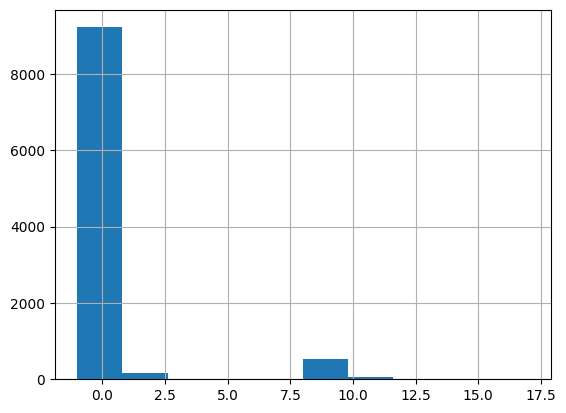

In [6]:
df["EmbeddedFile"].hist()

In [7]:
print(len(df[df['Class'] == "Malicious"]))

print(len(df[(df["Class"] == 'Malicious') & (df["RichMedia"] == '-1')]))
print(len(df[(df["Class"] == 'Benign') & (df["RichMedia"] == '-1')]))

5542
0
0


In [8]:
print(df["XFA"].value_counts())

XFA
 0    8953
-1     562
 1     495
Name: count, dtype: int64
